In [ ]:
!pip install tensorflow numpy pandas scikit-learn opencv-python matplotlib pillow
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.activations import relu,sigmoid,linear
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/file/data.csv")
data

,Image,label
0,BikesHelmets0,1
1,BikesHelmets1,1
2,BikesHelmets2,1
3,BikesHelmets3,1
4,BikesHelmets4,1
...,...,...
745,BikesHelmets746,1
746,BikesHelmets747,1
747,BikesHelmets748,1
748,BikesHelmets749,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
len(data['label'])

750

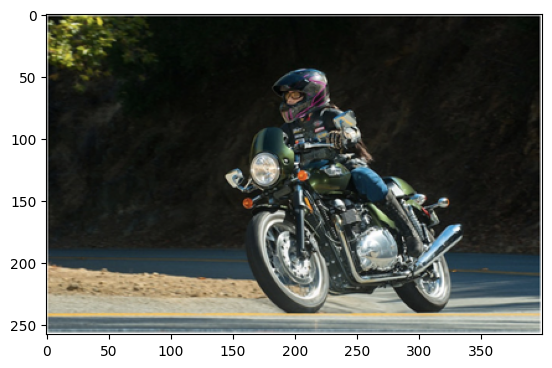

(258, 400, 4)


In [ ]:
img = mpimg.imread('/content/drive/MyDrive/file/'+data['Image'][4]+'.png')
imgplot = plt.imshow(img)
plt.show()
print(img.shape)

In [ ]:
type(data['Image'])

pandas.core.series.Series

In [ ]:
import os

In [17]:
x = []
file_path = "/content/drive/MyDrive/file/"

for i in data['Image']:
    img_path = os.path.join(file_path, i + ".png")

    if not os.path.exists(img_path):  # Skip missing files
        print(f"Skipping {img_path}, file not found.")
        continue

    try:
        img = Image.open(img_path).resize((64, 64)).convert('RGB')
        x.append(np.array(img))
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

In [18]:
print(x[0].shape)

(64, 64, 3)


In [19]:
x = np.array(x)
y = np.array(data['label'])

In [20]:
x_scaled = x/255
x_scaled.shape

(750, 64, 64, 3)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20)

In [22]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,264,066 (12.45 MB)

 Trainable params: 3,264,066 (12.45 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['acc']
)

In [25]:
history = model.fit(x_train,y_train,validation_split = 0.1,epochs = 10)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - acc: 0.5821 - loss: 0.8201 - val_acc: 0.6667 - val_loss: 0.6662
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - acc: 0.6964 - loss: 0.6337 - val_acc: 0.6667 - val_loss: 0.6340
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - acc: 0.6844 - loss: 0.6401 - val_acc: 0.6667 - val_loss: 0.6282
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - acc: 0.6727 - loss: 0.6244 - val_acc: 0.6667 - val_loss: 0.6447
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - acc: 0.6844 - loss: 0.6219 - val_acc: 0.6833 - val_loss: 0.6111
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - acc: 0.7354 - loss: 0.5505 - val_acc: 0.6833 - val_loss: 0.5944
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - acc: 0.7561 - loss: 0.5029 - val_acc: 0.6667 - val_loss: 0.5947
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - acc: 0.8235 - loss: 0.4092 - val_acc: 0.6667 - val_loss: 0.7388
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - ac

In [26]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Test Accuracy: {}".format(accuracy))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - acc: 0.6558 - loss: 0.7697
Test Accuracy: 0.6666666865348816


[]

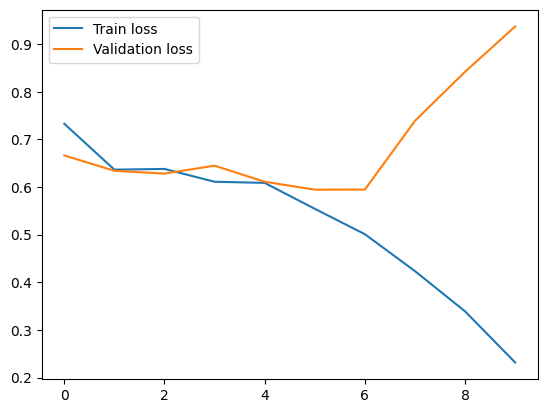

In [27]:
h = history
plt.plot(h.history['loss'],label = 'Train loss')
plt.plot(h.history['val_loss'],label = 'Validation loss')
plt.legend()
plt.plot()


[]

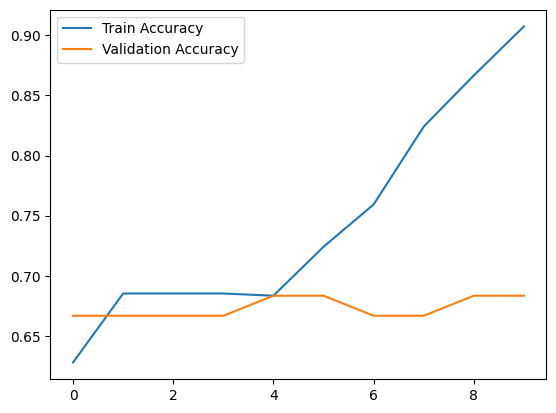

In [28]:
plt.plot(h.history['acc'],label = 'Train Accuracy')
plt.plot(h.history['val_acc'],label = 'Validation Accuracy')
plt.legend()
plt.plot()

Enter the image path : /content/drive/MyDrive/file/BikesHelmets500.png


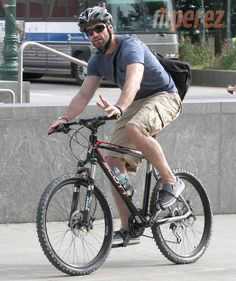

In [31]:
img_path = input("Enter the image path : ")
inp_img = cv2.imread(img_path)
cv2_imshow(inp_img)

In [32]:
img = Image.open(img_path)
img = img.resize((64,64))
img = img.convert('RGB')
img = np.array(img)

#inp_img = cv2.resize(inp_img,(64,64))
inp_img = img / 255
print(inp_img.shape)
inp_img = np.reshape(inp_img,[1,64,64,3])
inp_prediction = model.predict(inp_img)
print(inp_prediction)

inp_pred_label = np.argmax(inp_prediction)
print(inp_pred_label)

if inp_pred_label == 1:
  print("The person in the image is wearing a helmet.")
else:
  print("The person in the image is not wearing a helmet.")

(64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.22850555 0.688885  ]]
1
The person in the image is wearing a helmet.
